# TASK 1 -EDA

#importing dependencies

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [5]:

#importing the dstasheet to a pandas dataframe
df = pd.read_csv("D:\d my desktop\winequality-red.csv")

In [6]:
print(df)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [7]:
df.shape

(1599, 12)

 Q.1:- Are there any missing and duplicate values in the wine datasheet? How should these missing values be handled?

In [8]:
#checking for missing values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [9]:
df.shape

(1599, 12)

In [10]:
#checking for duplicate records
df.duplicated()

0       False
1       False
2       False
3       False
4        True
        ...  
1594    False
1595    False
1596     True
1597    False
1598    False
Length: 1599, dtype: bool

In [12]:
#removing duplicated values
df.drop_duplicates()
print(df)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

no missing and duplicate values for this dataset

Q.2:-How are the different input variables (chemical properties) distributed? Are there any outliers? How does the alcohol content vary across different quality categories?

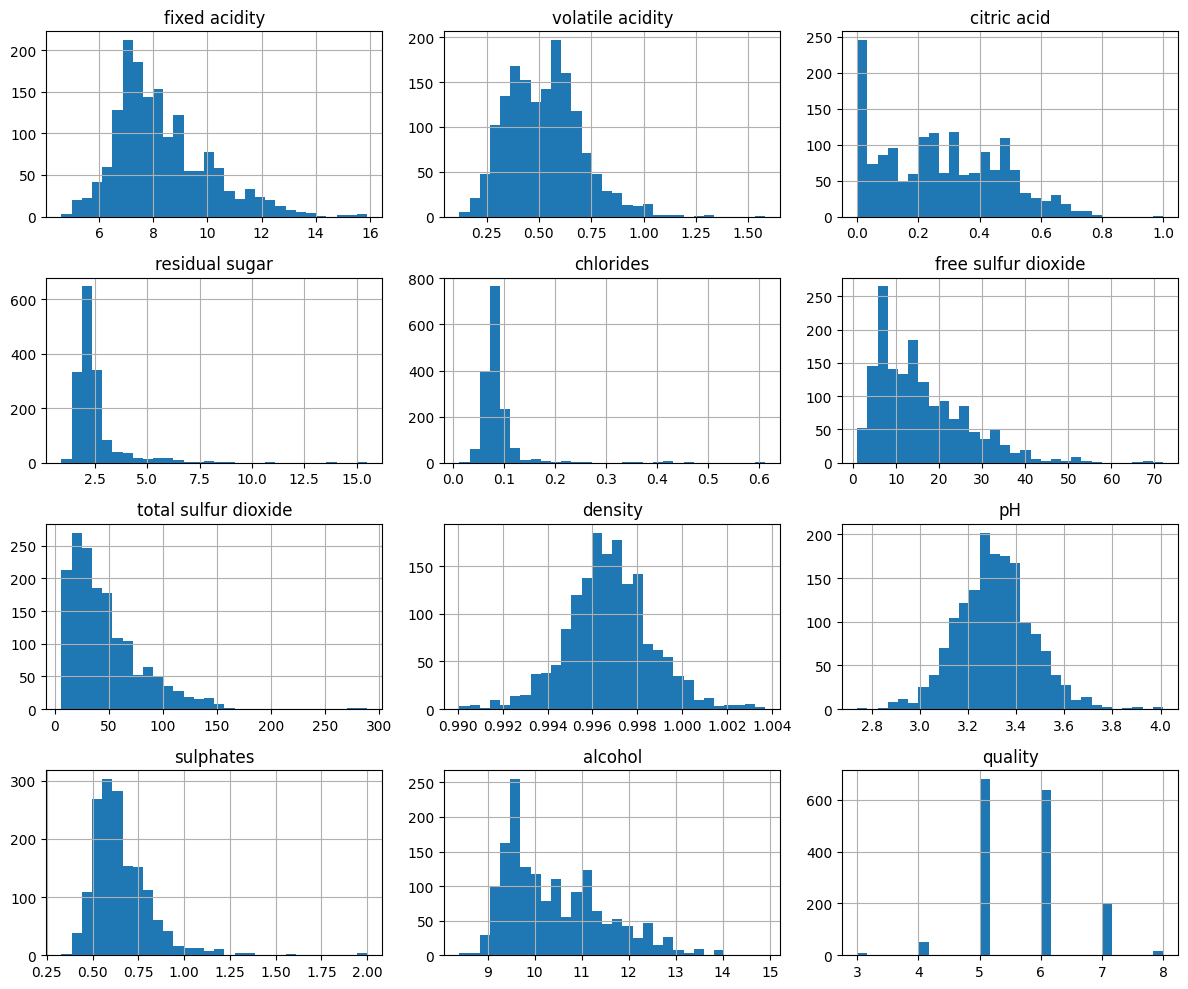

In [13]:
# Distribution of  all input variables in one frame by using histogram graph
df.hist(figsize=(12, 10), bins=30)
plt.tight_layout()
plt.show()

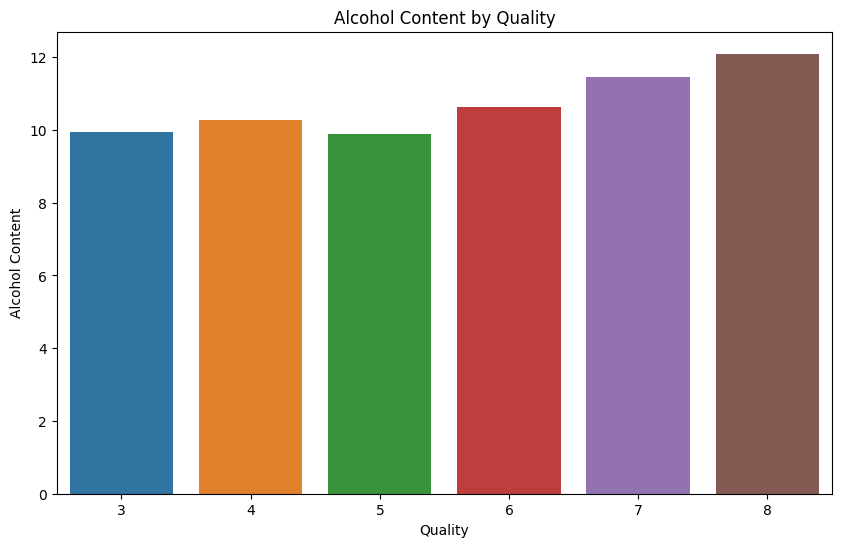

In [15]:
# Group the data by quality and calculate the mean alcohol content
alcohol_by_quality = df.groupby('quality')['alcohol'].mean()

# Plot the alcohol content by quality
plt.figure(figsize=(10, 6))
sns.barplot(x=alcohol_by_quality.index, y=alcohol_by_quality.values)
plt.title('Alcohol Content by Quality')
plt.xlabel('Quality')
plt.ylabel('Alcohol Content')
plt.show()

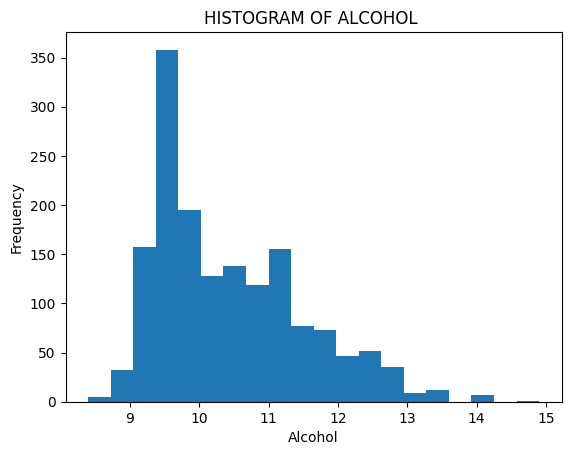

In [16]:
# Outlier detection
numeric_cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
                'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
                'pH', 'sulphates', 'alcohol']

plt.hist(df['alcohol'],bins=20)
plt.xlabel('Alcohol')
plt.ylabel('Frequency')
plt.title('HISTOGRAM OF ALCOHOL ')
plt.show()

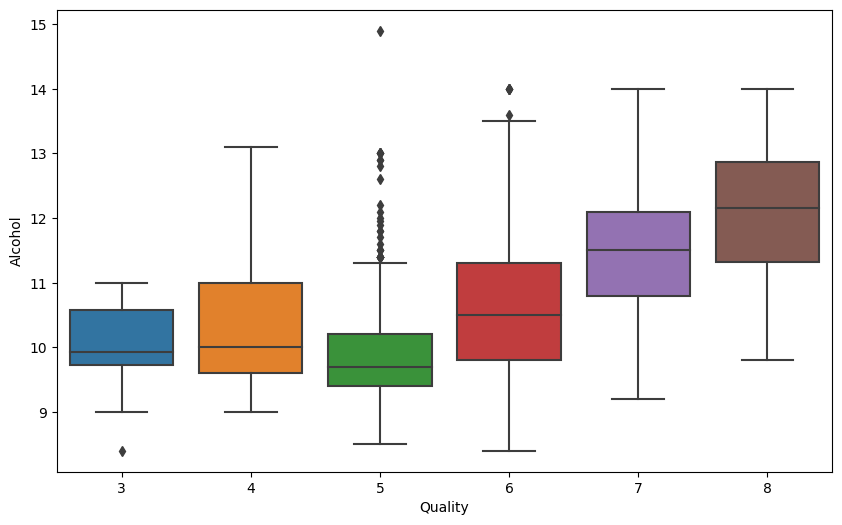

In [18]:
#Variation of alcohol content across quality categories
plt.figure(figsize=(10,6))
sns.boxplot(x='quality', y='alcohol', data=df)
plt.xlabel('Quality')
plt.ylabel('Alcohol')
plt.show()

<Axes: ylabel='quality'>

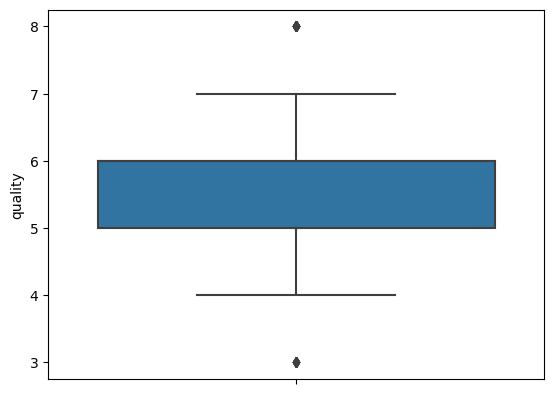

In [19]:
sns.boxplot(data=df, y='quality')

Q.3:- Is there any correlation between the input variables and the quality score? Which variables have the strongest correlation? Are there any notable differences in the input variables between different quality categories?




In [22]:
correlation = df.corr()

<Axes: >

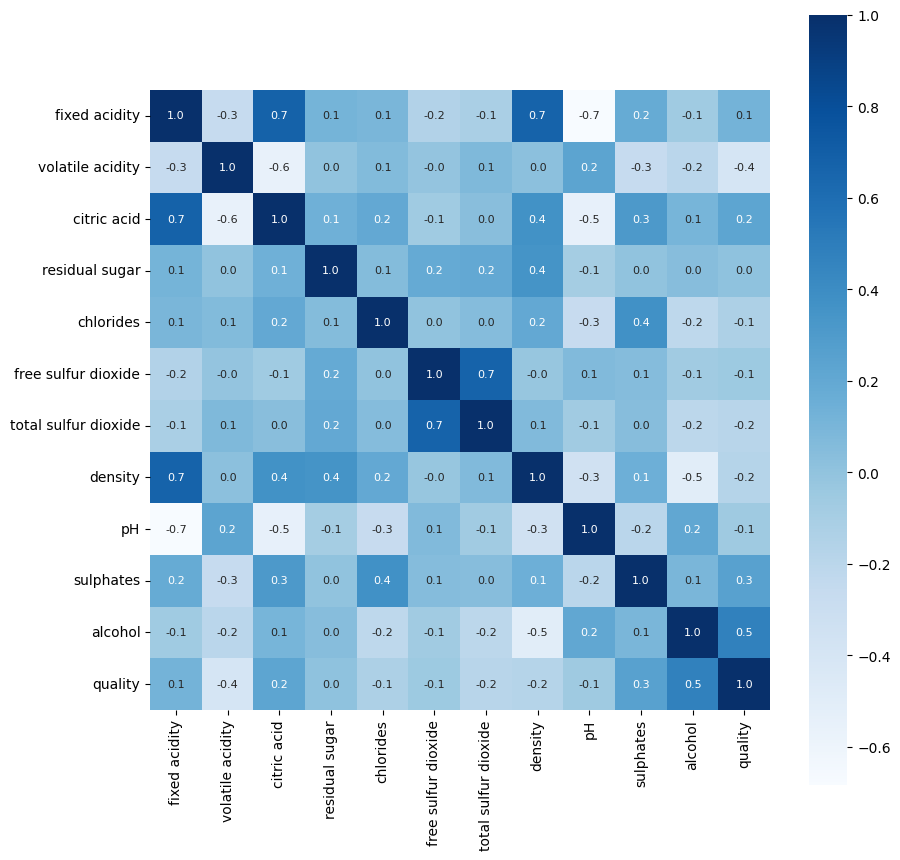

In [23]:
#Constructing heatmap to understand correlation between input variables and quality
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt = '.1f', annot = True, annot_kws={'size':8}, cmap = 'Blues')

Darkest blue colour has the most +ve value (+1) hence showing strongest correlation
All positive values indicate directly proptional relation
All negative values indicate inversly propotional relation
This means Alcohol is strongly related to quality and is directly related, volatile acidity is most negatively related to quality(-0.4) hence inversely proportional.

Q.4:- What is the range and distribution of each input variable? Are there any variables that need normalization or scaling?

In [26]:
# Select the input variable columns
input_vars = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
              'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

# Calculate summary statistics
summary_stats = df[input_vars].describe()


In [27]:
summary_stats

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


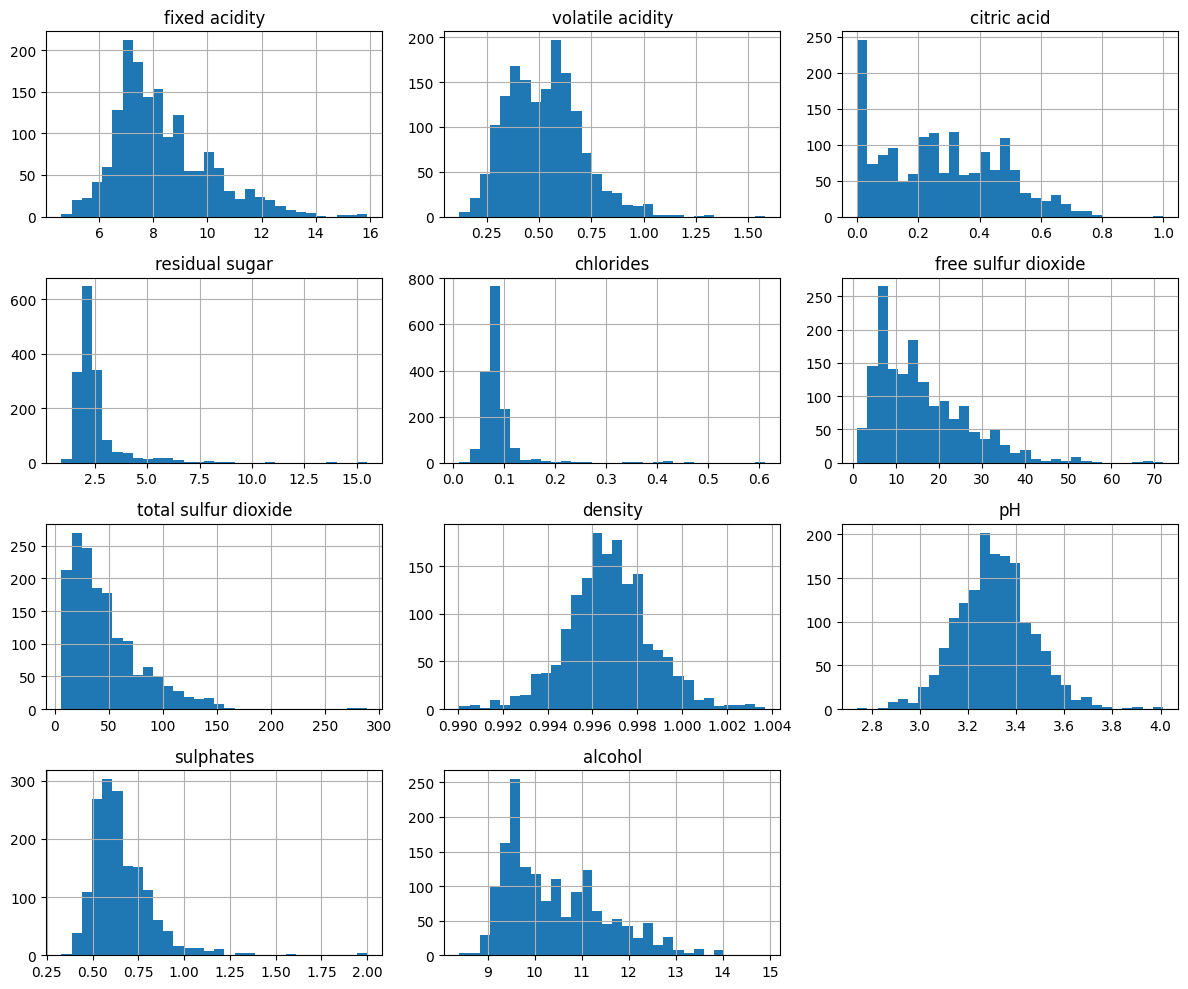

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

In [28]:
# Plot histograms
df[input_vars].hist(figsize=(12, 10), bins=30)
plt.tight_layout()
plt.show()

# Print summary statistics
print(summary_stats)

If the variables have significantly different scales or ranges, it may be beneficial to apply normalization or scaling techniques (e.g., Min-Max scaling or Standard scaling) to ensure that the variables contribute equally to the analysis.




Q.5:-Can you visualize the relationship between pairs of input variables using scatter plots or heatmaps? Are there any interesting observations or trends?

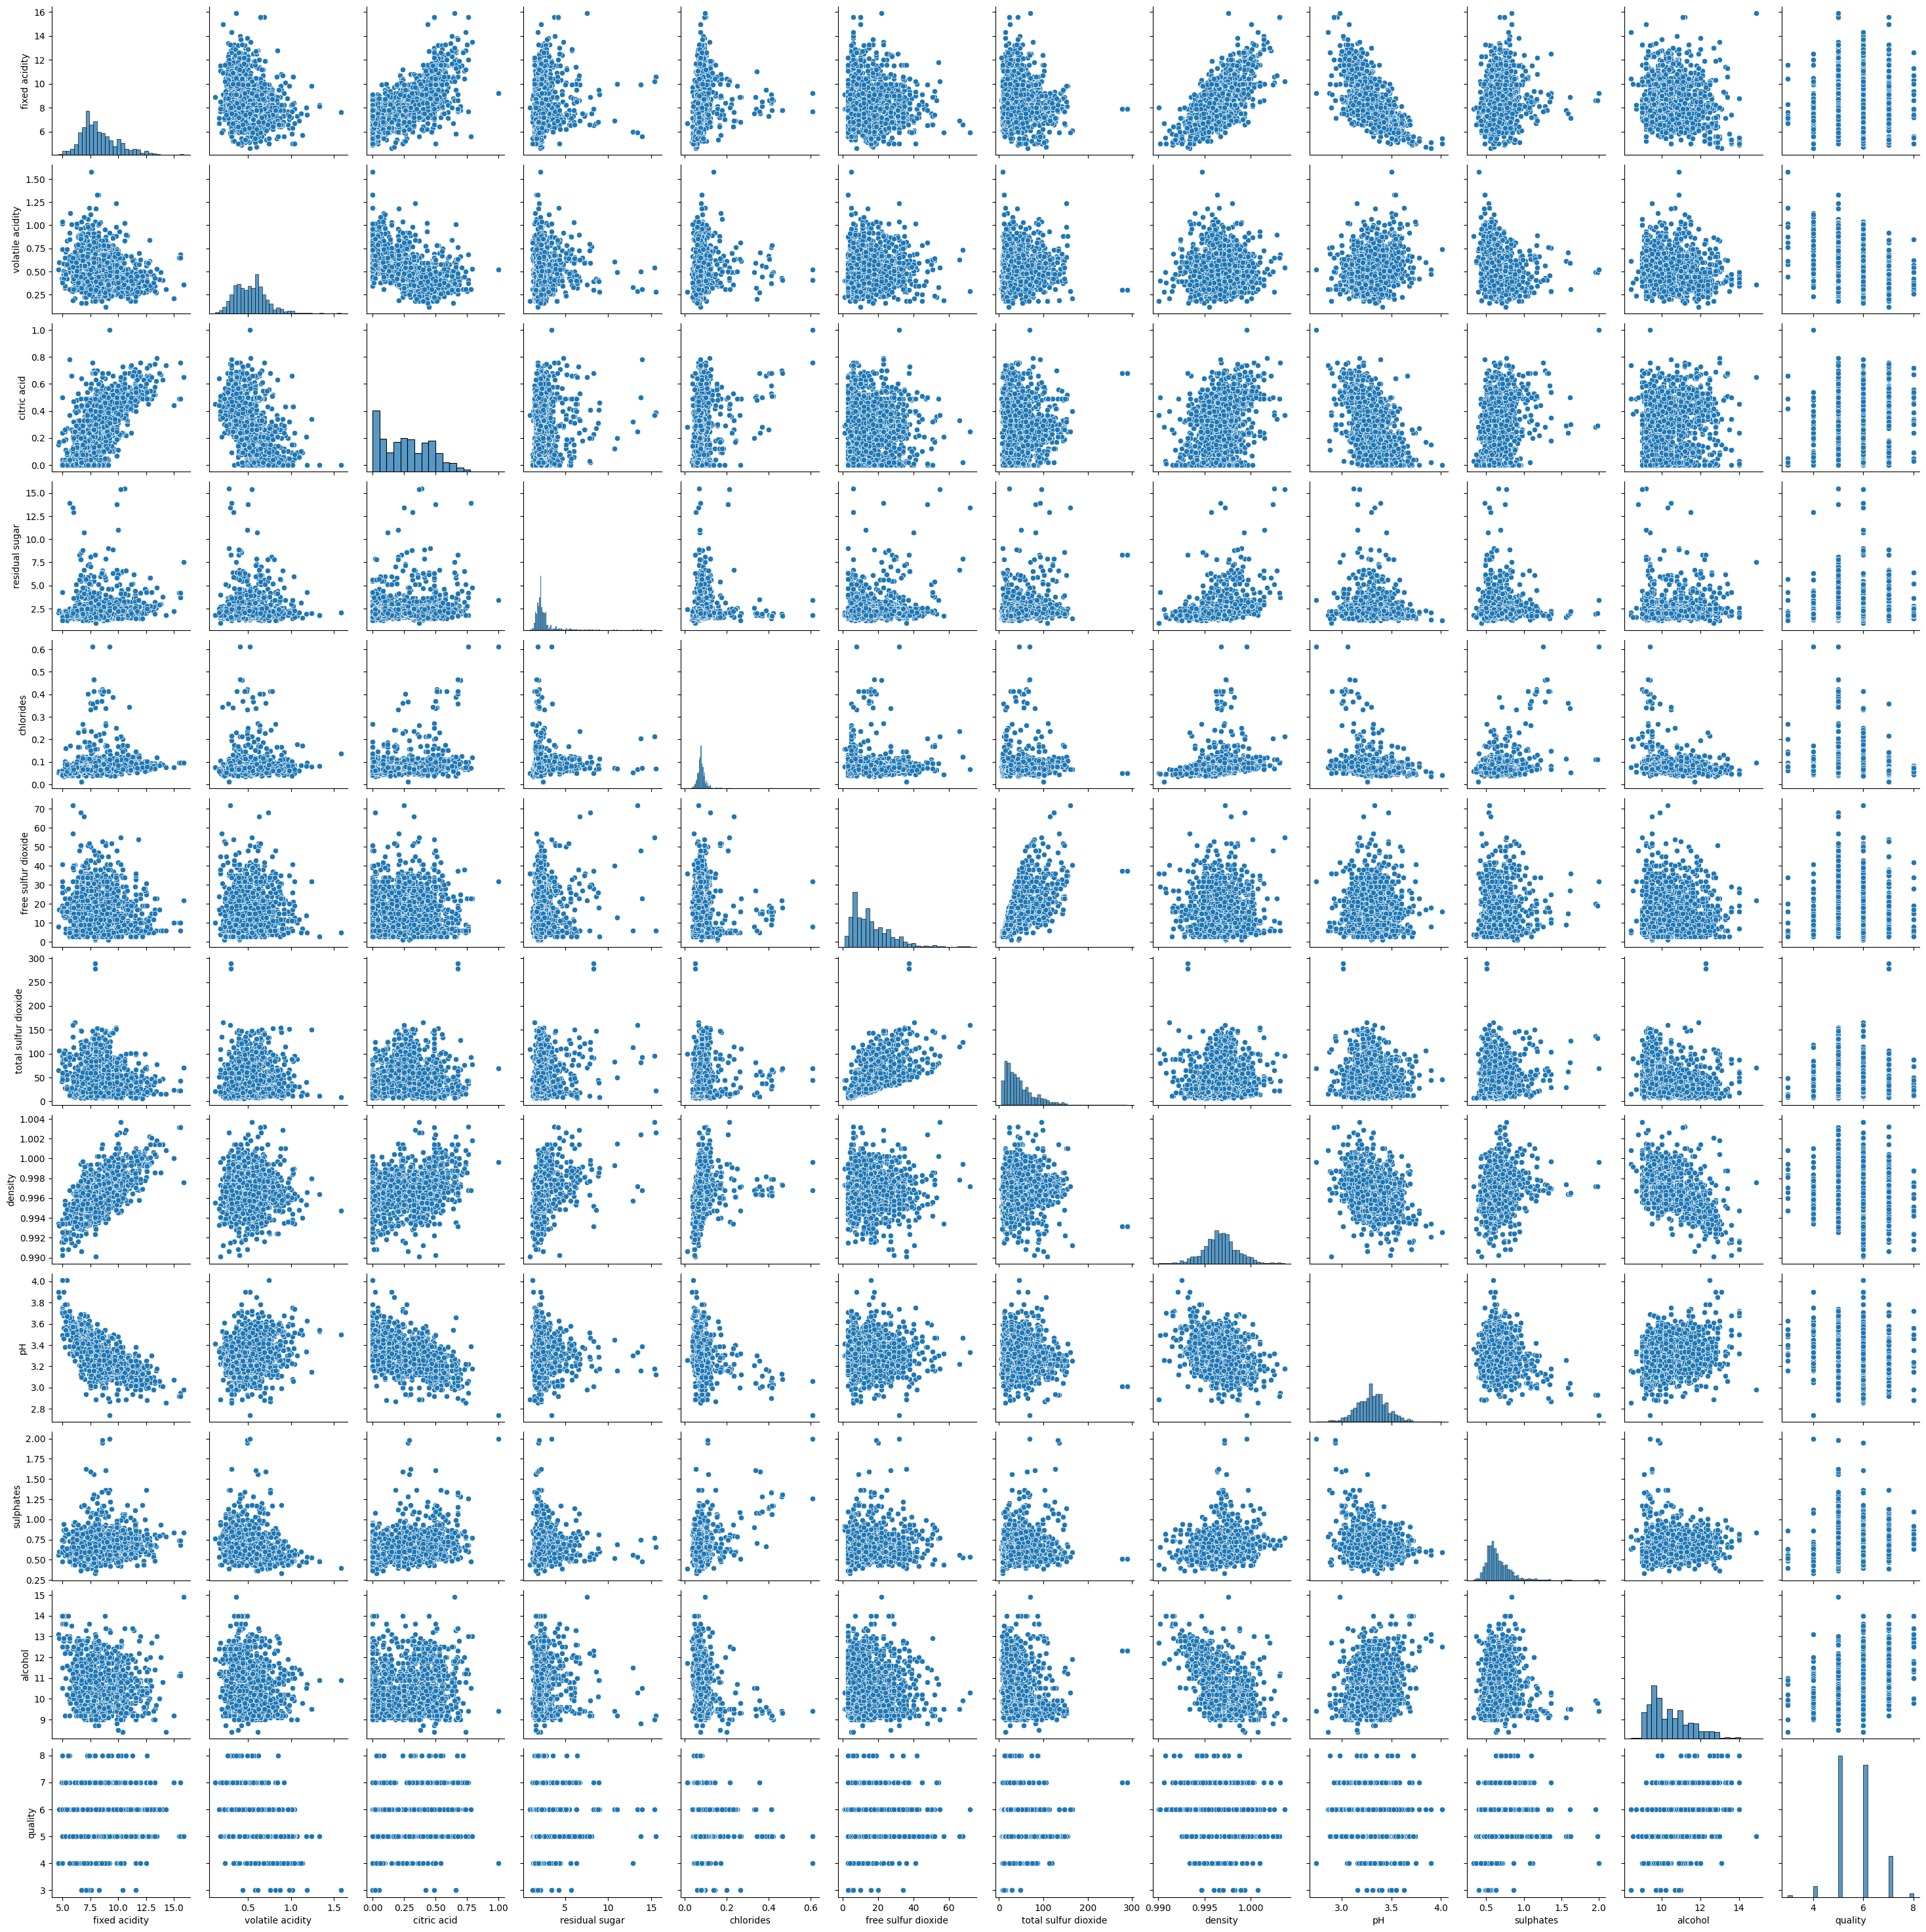

In [30]:
# visualize relationship between pairs of input variables using scatter plots
sns.pairplot(df)


# TASK 2

### classification/regression

Perform following steps on the same dataset which you used for EDA.

Data Preprocessing (as per requirement)

Feature Engineering

Split dataset in train-test (80:20 ratio)

Model selection

Model training

Model evaluation

Fine-tune the Model

Make predictions

Summarize your model's performance by evaluation metrices

### Data Preprocessing

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV


In [16]:

df = pd.read_csv("D:\d my desktop\winequality-red.csv")





In [15]:
# separate the data and Label
X = df.drop('quality',axis=1)

In [17]:
print(X)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [20]:
Y = df['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)

In [21]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


### Train and Test split

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [23]:
print(Y.shape, Y_train.shape, Y_test.shape)


(1599,) (1279,) (320,)


In [8]:
model = RandomForestClassifier()


In [37]:
# Model Selection
model = LogisticRegression()  # Choose your desired model here

# Model Training
model.fit(X_train, Y_train)

# Model Evaluation
Y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
print('Accuracy:', accuracy)

# Fine-tune the Model
# ... perform any hyperparameter tuning or model optimization steps here

# Make Predictions
# ... use the trained model to make predictions on new data points

Accuracy: 0.9


D:\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
